In [1]:
using Revise

In [13]:
using CairoMakie
using DrWatson
@quickactivate :LowRankVlasov1D1V

using LinearAlgebra

Λ = [0.045822302531558265, 0.27508853793568233, 2.886836064390916]


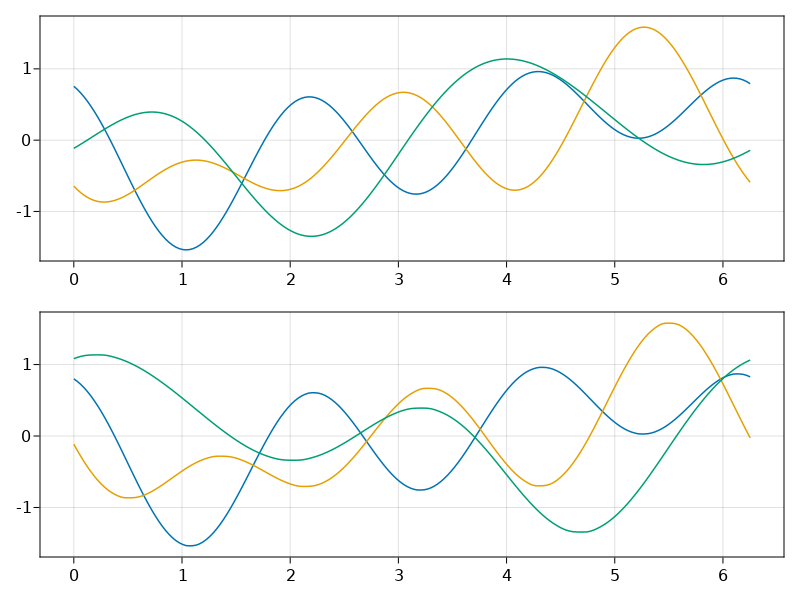

In [20]:
domain = make_domain(nx=200, x_min=0.0, x_max=2π, nv=10, v_min=-10.0);
dx = domain.dx
Dx = domain.Dx
Ax = domain.Ax

u = hcat(sin.(2domain.x), cos.(3domain.x), sin.(domain.x))

A = rand(3, 3); A = A*A';

Λ, R = eigen(A);
u = u * R';
@show Λ

fig = Figure()
ax = Axis(fig[1, 1])
for j in 1:3
    lines!(ax, domain.x, u[:, j])
end

Δt = 0.79 * dx / maximum(abs.(Λ))
for i in 1:100
    du = -Δt * LowRankVlasov1D1V.flux_limited_linear_hyperbolic(diagm(Λ), u, Dx, Ax, true, Δt, dx)
    u += du
end

ax = Axis(fig[2, 1])
for j in 1:3
    lines!(ax, domain.x, u[:, j])
end
fig

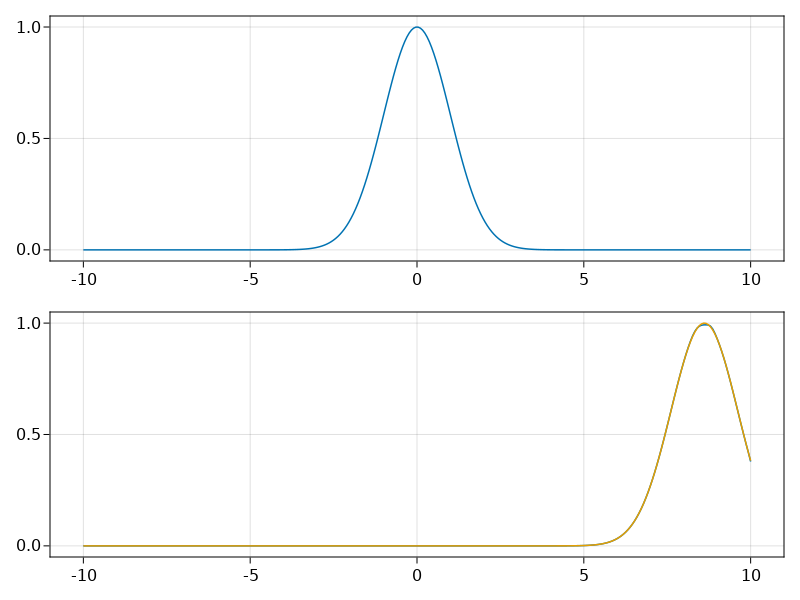

In [30]:
domain = make_domain(nx=20, x_min=0.0, x_max=2π, nv=300, v_min=-10.0);
dv = domain.dv
Dv = domain.Dv
Av = domain.Av

f = reshape(exp.(-domain.v.^2 ./ 2), (:, 1))

A = zeros(1, 1); A[1, 1] = 2.4;

fig = Figure()
ax = Axis(fig[1, 1])
lines!(ax, domain.v, f[:, 1])

Δt = 0.79 * dv / 2.4;
T = 3.6
nt = Int(floor(T / Δt))
for i in 1:nt
    df = -Δt * LowRankVlasov1D1V.flux_limited_linear_hyperbolic(A, f, Dv, Av, true, Δt, dv)
    f += df
end

ax = Axis(fig[2, 1])
lines!(ax, domain.v, f[:, 1])
lines!(ax, domain.v, exp.(-(domain.v .- nt * Δt * 2.4).^2 ./ 2))
fig